In [31]:
# starting by reading in the shorter ratings tables
import pandas as pd
import numpy as np

over_hundred_ratings = pd.read_csv('over_hundred_ratings.csv')
short_books = pd.read_csv('short_books.csv')
count_ratings = pd.read_csv('count_user_ratings.csv')

In [24]:
train_over_hundred = over_hundred_ratings.copy()
train_over_hundred.drop('count_ratings', axis=1, inplace=True)
train_over_hundred

,user_id,book_id,rating
0,5493,188,4
1,5493,184,5
2,9454,39,4
3,49086,40,1
4,9454,49,5
...,...,...,...
1324476,45554,71,5
1324477,45554,1518,4
1324478,45554,1597,5
1324479,45554,212,4


In [25]:
scaler = StandardScaler()
train_over_hundred['rating'] = scaler.fit_transform(train_over_hundred[['rating']])

In [26]:
train_over_hundred.sort_values(by='user_id', inplace=True)
train_over_hundred.reset_index(inplace=True)

In [27]:
train_over_hundred.drop('index', axis=1, inplace=True)

In [28]:
train_over_hundred

,user_id,book_id,rating
0,1,162,0.129589
1,1,1310,0.129589
2,1,325,-0.860016
3,1,323,-0.860016
4,1,306,-0.860016
...,...,...,...
1324476,53424,42,1.119194
1324477,53424,31,1.119194
1324478,53424,116,1.119194
1324479,53424,679,0.129589


<AxesSubplot:ylabel='Frequency'>

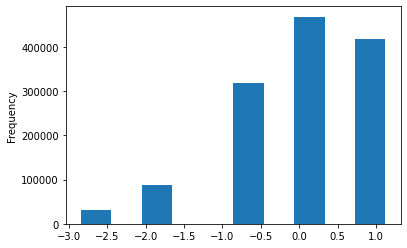

In [29]:
train_over_hundred['rating'].plot(kind="hist")

In [32]:
scale_over_hundred = over_hundred_ratings.copy()

In [33]:
scale_over_hundred

,user_id,book_id,rating,count_ratings
0,5493,188,4,101
1,5493,184,5,101
2,9454,39,4,101
3,49086,40,1,101
4,9454,49,5,101
...,...,...,...,...
1324476,45554,71,5,195
1324477,45554,1518,4,195
1324478,45554,1597,5,195
1324479,45554,212,4,195


In [34]:
scale_over_hundred.sort_values(by='user_id', inplace=True)
scale_over_hundred.reset_index(inplace=True)
scale_over_hundred.drop('index', axis=1, inplace=True)
scale_over_hundred

,user_id,book_id,rating,count_ratings
0,1,162,4,102
1,1,1310,4,102
2,1,325,3,102
3,1,323,3,102
4,1,306,3,102
...,...,...,...,...
1324476,53424,42,5,105
1324477,53424,31,5,105
1324478,53424,116,5,105
1324479,53424,679,4,105


In [35]:
count_ratings

,user_id,count_ratings
0,1,102
1,2,48
2,3,62
3,4,130
4,5,44
...,...,...
53419,53420,93
53420,53421,85
53421,53422,105
53422,53423,63


In [54]:
# fix ratings by calculating mean
mean = []
user_id = []
index = 0

for x in range(0, len(count_ratings)):
    if (count_ratings.at[x, 'user_id'] == scale_over_hundred.at[index, 'user_id']):
        user_id.append(count_ratings.at[x, 'user_id'])
        total_ratings = 0
        for y in range(0, count_ratings.at[x, 'count_ratings']):
            if (index < len(scale_over_hundred)):
                total_ratings = total_ratings + scale_over_hundred.at[index, 'rating']
                index = index + 1
        mean.append(total_ratings/count_ratings.at[x, 'count_ratings'])

In [55]:
avg_user_ratings = pd.DataFrame({'user_id': user_id, 'average_ratings': mean})

In [56]:
avg_user_ratings

,user_id,average_ratings
0,1,3.617647
1,4,3.761538
2,7,3.887850
3,9,3.403361
4,10,3.792079
...,...,...
11250,53394,3.963636
11251,53403,3.654545
11252,53419,3.336449
11253,53422,4.161905


In [57]:
scale_over_hundred.tail()

,user_id,book_id,rating,count_ratings
1324476,53424,42,5,105
1324477,53424,31,5,105
1324478,53424,116,5,105
1324479,53424,679,4,105
1324480,53424,219,5,105


In [58]:
avg_user_ratings.to_csv("avg_user_ratings.csv", index=False)

In [59]:
avg_user_ratings.sort_values(by='user_id', inplace=True)

In [60]:
avg_user_ratings

,user_id,average_ratings
0,1,3.617647
1,4,3.761538
2,7,3.887850
3,9,3.403361
4,10,3.792079
...,...,...
11250,53394,3.963636
11251,53403,3.654545
11252,53419,3.336449
11253,53422,4.161905


In [61]:
new_over_hundred = scale_over_hundred.copy()
new_over_hundred = pd.merge(new_over_hundred, avg_user_ratings, on = "user_id", how = "outer")

In [62]:
new_over_hundred

,user_id,book_id,rating,count_ratings,average_ratings
0,1,162,4,102,3.617647
1,1,1310,4,102,3.617647
2,1,325,3,102,3.617647
3,1,323,3,102,3.617647
4,1,306,3,102,3.617647
...,...,...,...,...,...
1324476,53424,42,5,105,4.438095
1324477,53424,31,5,105,4.438095
1324478,53424,116,5,105,4.438095
1324479,53424,679,4,105,4.438095


In [63]:
new_over_hundred['scaled_ratings'] = new_over_hundred['rating'] - new_over_hundred['average_ratings']

In [64]:
new_over_hundred

,user_id,book_id,rating,count_ratings,average_ratings,scaled_ratings
0,1,162,4,102,3.617647,0.382353
1,1,1310,4,102,3.617647,0.382353
2,1,325,3,102,3.617647,-0.617647
3,1,323,3,102,3.617647,-0.617647
4,1,306,3,102,3.617647,-0.617647
...,...,...,...,...,...,...
1324476,53424,42,5,105,4.438095,0.561905
1324477,53424,31,5,105,4.438095,0.561905
1324478,53424,116,5,105,4.438095,0.561905
1324479,53424,679,4,105,4.438095,-0.438095


<AxesSubplot:ylabel='Frequency'>

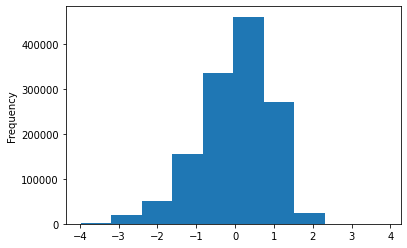

In [67]:
new_over_hundred['scaled_ratings'].plot(kind="hist")

In [72]:
min(new_over_hundred['scaled_ratings'])

-3.9682539682539684

In [74]:
max(new_over_hundred['scaled_ratings'])

3.8689655172413793

In [75]:
new_over_hundred['scaled_ratings'].mean()

-5.03844793275018e-18

In [65]:
# try doing the same thing with whole dataset
import pandas as pd
import numpy as np

ratings = pd.read_csv('Books Data/ratings.csv')
books = pd.read_csv('Books Data/books.csv')
count_ratings = pd.read_csv('count_user_ratings.csv')

In [66]:
ratings

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3
...,...,...,...
5976474,49925,510,5
5976475,49925,528,4
5976476,49925,722,4
5976477,49925,949,5


<AxesSubplot:ylabel='Frequency'>

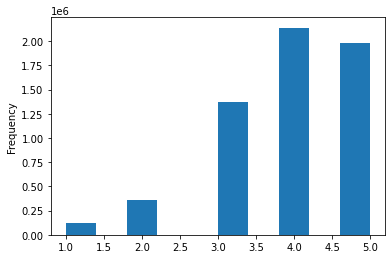

In [70]:
ratings['rating'].plot(kind="hist")

In [77]:
scale_ratings = ratings.copy()
scale_ratings.sort_values(by='user_id', inplace=True)
scale_ratings.reset_index(inplace=True)
scale_ratings.drop('index', axis=1, inplace=True)
scale_ratings

,user_id,book_id,rating
0,1,258,5
1,1,140,3
2,1,869,4
3,1,2679,3
4,1,1310,4
...,...,...,...
5976474,53424,5500,4
5976475,53424,4214,5
5976476,53424,2032,4
5976477,53424,41,5


In [87]:
scale_ratings = pd.merge(scale_ratings, count_ratings, on = "user_id", how = "outer")

In [88]:
scale_ratings

,user_id,book_id,rating,count_ratings
0,1,258,5,102
1,1,140,3,102
2,1,869,4,102
3,1,2679,3,102
4,1,1310,4,102
...,...,...,...,...
5976474,53424,5500,4,105
5976475,53424,4214,5,105
5976476,53424,2032,4,105
5976477,53424,41,5,105


In [90]:
# fix ratings by calculating mean
mean = []
user_id = []
index = 0

for x in range(0, len(count_ratings)):
    user_id.append(count_ratings.at[x, 'user_id'])
    total_ratings = 0
    for y in range(0, count_ratings.at[x, 'count_ratings']):
        if (index < len(scale_ratings)):
            total_ratings = total_ratings + scale_ratings.at[index, 'rating']
            index = index + 1
    mean.append(total_ratings/count_ratings.at[x, 'count_ratings'])

In [91]:
avg_user_ratings = pd.DataFrame({'user_id': user_id, 'average_ratings': mean})

In [93]:
avg_user_ratings

,user_id,average_ratings
0,1,3.568627
1,2,4.104167
2,3,3.387097
3,4,2.700000
4,5,3.659091
...,...,...
53419,53420,3.849462
53420,53421,4.505882
53421,53422,3.952381
53422,53423,4.095238


In [94]:
scale_ratings = pd.merge(scale_ratings, avg_user_ratings, on = "user_id", how = "outer")

In [96]:
scale_ratings['scaled_ratings'] = scale_ratings['rating'] - scale_ratings['average_ratings']

In [97]:
scale_ratings

,user_id,book_id,rating,count_ratings,average_ratings,scaled_ratings
0,1,258,5,102,3.568627,1.431373
1,1,140,3,102,3.568627,-0.568627
2,1,869,4,102,3.568627,0.431373
3,1,2679,3,102,3.568627,-0.568627
4,1,1310,4,102,3.568627,0.431373
...,...,...,...,...,...,...
5976474,53424,5500,4,105,4.400000,-0.400000
5976475,53424,4214,5,105,4.400000,0.600000
5976476,53424,2032,4,105,4.400000,-0.400000
5976477,53424,41,5,105,4.400000,0.600000


<AxesSubplot:ylabel='Frequency'>

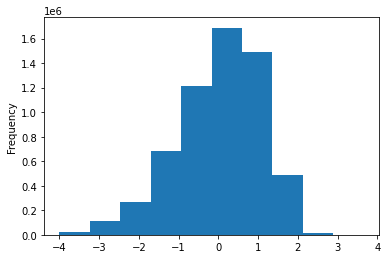

In [98]:
scale_ratings['scaled_ratings'].plot(kind="hist")

In [99]:
scale_ratings.to_csv('scale_ratings.csv', index=False)

In [3]:
# starting new work session to try training the dataset using the 
# standardized values for ratings
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
import sklearn
from sklearn.decomposition import TruncatedSVD
from sklearn.neighbors import NearestNeighbors

scale_ratings = pd.read_csv('scale_ratings.csv')
to_read = pd.read_csv('Books Data/to_read.csv')

In [4]:
scale_ratings.head()

,user_id,book_id,rating,count_ratings,average_ratings,scaled_ratings
0,1,258,5,102,3.568627,1.431373
1,1,140,3,102,3.568627,-0.568627
2,1,869,4,102,3.568627,0.431373
3,1,2679,3,102,3.568627,-0.568627
4,1,1310,4,102,3.568627,0.431373


In [10]:
from sklearn.preprocessing import MinMaxScaler

train_ratings = scale_ratings.copy()
scaler = MinMaxScaler()
train_ratings['scaled_ratings'] = scaler.fit_transform(train_ratings[['scaled_ratings']])

In [11]:
train_ratings

,user_id,book_id,rating,count_ratings,average_ratings,scaled_ratings
0,1,258,5,102,3.568627,0.709361
1,1,140,3,102,3.568627,0.448152
2,1,869,4,102,3.568627,0.578756
3,1,2679,3,102,3.568627,0.448152
4,1,1310,4,102,3.568627,0.578756
...,...,...,...,...,...,...
5976474,53424,5500,4,105,4.400000,0.470175
5976475,53424,4214,5,105,4.400000,0.600780
5976476,53424,2032,4,105,4.400000,0.470175
5976477,53424,41,5,105,4.400000,0.600780


In [12]:
max(train_ratings['scaled_ratings'])

1.0

In [13]:
min(train_ratings['scaled_ratings'])

0.0

In [14]:
train_ratings['scaled_ratings'].mean()

0.526493562911555

In [16]:
to_read.sort_values(by='user_id', inplace=True)
to_read

,user_id,book_id
614750,1,235
775761,1,2058
581413,1,1874
775760,1,112
775759,1,533
...,...,...
746357,53424,8859
746355,53424,778
746352,53424,4844
744779,53424,1512


In [17]:
train_ratings.drop(train_ratings.columns.difference(['user_id', 'book_id', 'scaled_ratings']), 1, inplace=True)

In [18]:
train_ratings

,user_id,book_id,scaled_ratings
0,1,258,0.709361
1,1,140,0.448152
2,1,869,0.578756
3,1,2679,0.448152
4,1,1310,0.578756
...,...,...,...
5976474,53424,5500,0.470175
5976475,53424,4214,0.600780
5976476,53424,2032,0.470175
5976477,53424,41,0.600780


In [22]:
# find 75th percentile of the data
train_ratings.scaled_ratings.quantile(0.75)

0.6365240586847235

In [23]:
train_ratings.scaled_ratings.quantile(0.25)

0.43314333654107134

<AxesSubplot:ylabel='Frequency'>

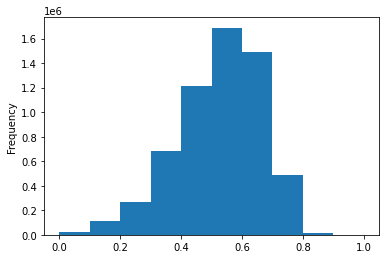

In [24]:
train_ratings.scaled_ratings.plot(kind='hist')

In [30]:
train_ratings.sort_values(['user_id', 'book_id'], inplace=True)
train_ratings.reset_index(inplace=True)
train_ratings.drop('index', axis=1, inplace=True)
train_ratings

,level_0,user_id,book_id,scaled_ratings
0,0,1,4,0.709361
1,1,1,10,0.578756
2,2,1,11,0.709361
3,3,1,13,0.578756
4,4,1,16,0.448152
...,...,...,...,...
5976474,5976474,53424,8609,0.470175
5976475,5976475,53424,8726,0.470175
5976476,5976476,53424,8969,0.600780
5976477,5976477,53424,9255,0.470175


In [31]:
train_ratings.drop('level_0', axis=1, inplace=True)
train_ratings

,user_id,book_id,scaled_ratings
0,1,4,0.709361
1,1,10,0.578756
2,1,11,0.709361
3,1,13,0.578756
4,1,16,0.448152
...,...,...,...
5976474,53424,8609,0.470175
5976475,53424,8726,0.470175
5976476,53424,8969,0.600780
5976477,53424,9255,0.470175


In [32]:
to_read.sort_values(['user_id', 'book_id'], inplace=True)
to_read.reset_index(inplace=True)
to_read.drop('index', axis=1, inplace=True)
to_read

,user_id,book_id
0,1,112
1,1,235
2,1,533
3,1,1198
4,1,1874
...,...,...
912700,53424,4716
912701,53424,4844
912702,53424,5907
912703,53424,7569


In [33]:
to_read['scaled_ratings'] = 0.6365240586847235

In [34]:
to_read

,user_id,book_id,scaled_ratings
0,1,112,0.636524
1,1,235,0.636524
2,1,533,0.636524
3,1,1198,0.636524
4,1,1874,0.636524
...,...,...,...
912700,53424,4716,0.636524
912701,53424,4844,0.636524
912702,53424,5907,0.636524
912703,53424,7569,0.636524


In [35]:
test_train_ratings = pd.concat([train_ratings, to_read])

In [36]:
test_train_ratings

,user_id,book_id,scaled_ratings
0,1,4,0.709361
1,1,10,0.578756
2,1,11,0.709361
3,1,13,0.578756
4,1,16,0.448152
...,...,...,...
912700,53424,4716,0.636524
912701,53424,4844,0.636524
912702,53424,5907,0.636524
912703,53424,7569,0.636524


<AxesSubplot:ylabel='Frequency'>

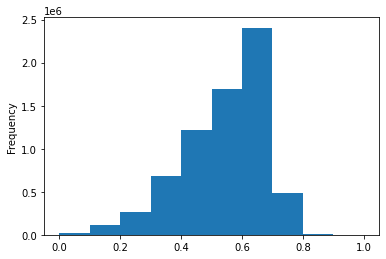

In [37]:
test_train_ratings.scaled_ratings.plot(kind="hist")

In [38]:
test_train_ratings.drop_duplicates(subset=['user_id', 'book_id'], keep='first', inplace=True) 

In [39]:
test_train_ratings

,user_id,book_id,scaled_ratings
0,1,4,0.709361
1,1,10,0.578756
2,1,11,0.709361
3,1,13,0.578756
4,1,16,0.448152
...,...,...,...
912700,53424,4716,0.636524
912701,53424,4844,0.636524
912702,53424,5907,0.636524
912703,53424,7569,0.636524


In [41]:
train_ratings_pivot = test_train_ratings.copy()
train_ratings_pivot = train_ratings_pivot.pivot(index = 'book_id', columns = 'user_id', values = 'scaled_ratings').fillna(0)

In [42]:
train_ratings_pivot

user_id,1,2,3,4,5,6,7,8,9,10,...,53415,53416,53417,53418,53419,53420,53421,53422,53423,53424
book_id,,,,,,,,,,,,,,,,,,,,,
1,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.533392,0.000000,...,0.0,0.0,0.442603,0.618765,0.517535,0.542078,0.456347,0.528636,0.509979,0.470175
2,0.000000,0.639417,0.000000,0.822807,0.0,0.0,0.000000,0.000000,0.533392,0.000000,...,0.0,0.0,0.000000,0.000000,0.648139,0.672682,0.586951,0.659241,0.640583,0.600780
3,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.533392,0.000000,...,0.0,0.0,0.000000,0.000000,0.386930,0.411474,0.000000,0.000000,0.000000,0.470175
4,0.709361,0.636524,0.471861,0.692203,0.0,0.0,0.000000,0.412992,0.000000,0.704746,...,0.0,0.0,0.000000,0.000000,0.386930,0.000000,0.586951,0.000000,0.640583,0.600780
5,0.000000,0.639417,0.000000,0.692203,0.0,0.0,0.361298,0.412992,0.663997,0.704746,...,0.0,0.0,0.000000,0.000000,0.386930,0.280869,0.456347,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9997,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9998,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [45]:
test_train_ratings.to_csv('train_scaled_ratings.csv', index=False)

In [44]:
train_ratings_matrix = csr_matrix(train_ratings_pivot.values)

In [46]:
train_ratings_matrix

<10000x53424 sparse matrix of type '<class 'numpy.float64'>'
	with 6886793 stored elements in Compressed Sparse Row format>

In [47]:
model_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
model_knn.fit(train_ratings_matrix)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [69]:
books_key = pd.read_csv('Books Data/books.csv')
books_key.title.fillna(books_key.original_title, inplace=True)
books_key.drop(books_key.columns.difference(['book_id', 'title']), 1, inplace=True)
books_key.head(75)

,book_id,title
0,1,"The Hunger Games (The Hunger Games, #1)"
1,2,Harry Potter and the Sorcerer's Stone (Harry P...
2,3,"Twilight (Twilight, #1)"
3,4,To Kill a Mockingbird
4,5,The Great Gatsby
...,...,...
70,71,Frankenstein
71,72,The Shining (The Shining #1)
72,73,"The Host (The Host, #1)"
73,74,Looking for Alaska


In [70]:
books_key['title'].isnull().values.any()

False

In [72]:
hashmap = dict(zip(books_key.book_id, books_key.title))

In [161]:
from difflib import SequenceMatcher

hashmap = dict(zip(books_key.book_id, books_key.title))
def get_book(book_name):
    for key, book in hashmap.items():
        temp = book.replace(':', ' (').split(' (')
        x = 0
        while x < len(temp):
            if SequenceMatcher(a=book_name, b=temp[x]).ratio() > 0.7:
                print(str(key) + ": " + book)
                x = len(temp)
            x = x + 1
    index = int(input("\nEnter the book index (enter -1 if not found): "))
    return index

In [162]:
test_index = get_book("the selection")

206: The Selection (The Selection, #1)
423: The Elite (The Selection, #2)
506: The One (The Selection, #3)
1062: The Heir (The Selection, #4)
2179: The Crown (The Selection, #5)

Enter the book index (enter -1 if not found): 1


In [178]:
def make_recommendations(book_name, n_recommendations):
    index = get_book(book_name)
    if (index == -1):
        return "Not Found"
    distances, indices = model_knn.kneighbors(train_ratings_matrix[index], 
                                             n_neighbors = n_recommendations+1)
    # first list is indices, second list is book titles, third is distances
    recommendation_results = []
    dist = []
    
    print('\nRecommendations:\n')
    for i in range(1, len(indices[0])):
        if (indices[0][i] > 0 and indices[0][i] <= 10000):
            recommendation_results.append(hashmap[indices[0][i]])
            dist.append(distances[0][i])
            print(hashmap[indices[0][i]])
    return distances, indices

In [172]:
temp = make_recommendations('the hunger games', 10)

1: The Hunger Games (The Hunger Games, #1)
17: Catching Fire (The Hunger Games, #2)
20: Mockingjay (The Hunger Games, #3)
717: The Hunger Games: Official Illustrated Movie Companion

Enter the book index (enter -1 if not found): 1

Recommendations:

Catching Fire (The Hunger Games, #2)
The Lovely Bones
Harry Potter and the Chamber of Secrets (Harry Potter, #2)
Mockingjay (The Hunger Games, #3)
The Da Vinci Code (Robert Langdon, #2)
Harry Potter and the Goblet of Fire (Harry Potter, #4)
The Fault in Our Stars
Harry Potter and the Sorcerer's Stone (Harry Potter, #1)
Twilight (Twilight, #1)


In [181]:
temp = make_recommendations('the selection', 10)

206: The Selection (The Selection, #1)
423: The Elite (The Selection, #2)
506: The One (The Selection, #3)
1062: The Heir (The Selection, #4)
2179: The Crown (The Selection, #5)

Enter the book index (enter -1 if not found): 2179

Recommendations:

American Lion: Andrew Jackson in the White House
Blue Moon (The Immortals, #2)
The Teachings of Don Juan: A Yaqui Way of Knowledge 
Doomsday Book (Oxford Time Travel, #1)
The Wrong Side of Goodbye (Harry Bosch, #21; Harry Bosch Universe, #26)
Crash (Crash, #1)
Golden Fool (Tawny Man, #2)
Packing for Mars: The Curious Science of Life in the Void
Eve (Eve, #1)
The Tale of the Body Thief (The Vampire Chronicles, #4)


In [179]:
temp = make_recommendations('the selection', 10)

206: The Selection (The Selection, #1)
423: The Elite (The Selection, #2)
506: The One (The Selection, #3)
1062: The Heir (The Selection, #4)
2179: The Crown (The Selection, #5)

Enter the book index (enter -1 if not found): 206

Recommendations:

Gerald's Game
The Unbecoming of Mara Dyer (Mara Dyer, #1)
The Summer I Turned Pretty (Summer, #1)
Absolute Power
The Forty Rules of Love
Loving Frank
The Austere Academy (A Series of Unfortunate Events, #5)
The Snowy Day
Diary
Ivanhoe


In [180]:
temp

(array([[0.        , 0.44547087, 0.4537079 , 0.47604572, 0.49246832,
         0.50123759, 0.50520993, 0.5067381 , 0.52341998, 0.5340653 ,
         0.55591878]]),
 array([[ 206,  911,  995, 1066, 1150, 1180, 1231, 1225, 1266, 1389, 1605]]))

In [175]:
temp = make_recommendations('macbeth', 10)

154: Macbeth

Enter the book index (enter -1 if not found): 154

Recommendations:

Great Expectations
Harry Potter and the Prisoner of Azkaban (Harry Potter, #3)
The Fault in Our Stars
A Dance with Dragons (A Song of Ice and Fire, #5)
The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics
Catching Fire (The Hunger Games, #2)
The Lovely Bones
Harry Potter and the Chamber of Secrets (Harry Potter, #2)
The Da Vinci Code (Robert Langdon, #2)
Harry Potter and the Goblet of Fire (Harry Potter, #4)


In [183]:
temp = make_recommendations('harry potter and the goblet of fire', 10)

23: Harry Potter and the Chamber of Secrets (Harry Potter, #2)
24: Harry Potter and the Goblet of Fire (Harry Potter, #4)
3054: Harry Potter and the Chamber of Secrets: Sheet Music for Flute with C.D

Enter the book index (enter -1 if not found): 24

Recommendations:

The Da Vinci Code (Robert Langdon, #2)
Harry Potter and the Chamber of Secrets (Harry Potter, #2)
Mockingjay (The Hunger Games, #3)
Catching Fire (The Hunger Games, #2)
The Lovely Bones
The Hunger Games (The Hunger Games, #1)
The Girl with the Dragon Tattoo (Millennium, #1)
The Fellowship of the Ring (The Lord of the Rings, #1)
Harry Potter and the Deathly Hallows (Harry Potter, #7)


In [184]:
temp = make_recommendations('mockingjay', 10)

20: Mockingjay (The Hunger Games, #3)

Enter the book index (enter -1 if not found): 20

Recommendations:

The Da Vinci Code (Robert Langdon, #2)
Harry Potter and the Chamber of Secrets (Harry Potter, #2)
Catching Fire (The Hunger Games, #2)
Harry Potter and the Goblet of Fire (Harry Potter, #4)
The Lovely Bones
The Hunger Games (The Hunger Games, #1)
The Girl with the Dragon Tattoo (Millennium, #1)
The Fellowship of the Ring (The Lord of the Rings, #1)
Harry Potter and the Deathly Hallows (Harry Potter, #7)


In [185]:
temp = make_recommendations('the catcher in the rye', 10)

8: The Catcher in the Rye

Enter the book index (enter -1 if not found): 8

Recommendations:

Harry Potter and the Deathly Hallows (Harry Potter, #7)
Unbroken: A World War II Story of Survival, Resilience, and Redemption
The Diary of a Young Girl
The Hunger Games (The Hunger Games, #1)
The Last Song
And Then There Were None
Pride and Prejudice
Twilight (Twilight, #1)
Harry Potter and the Sorcerer's Stone (Harry Potter, #1)


In [187]:
temp = make_recommendations('to all the boys i loved before', 10)

827: To All the Boys I've Loved Before (To All the Boys I've Loved Before, #1)
2112: P.S. I Still Love You (To All the Boys I've Loved Before, #2)

Enter the book index (enter -1 if not found): 827

Recommendations:

The Sea of Tranquility
The Prophet
Queen of Shadows (Throne of Glass, #4)
Plainsong (Plainsong, #1)
The Origin of Species
Wild: From Lost to Found on the Pacific Crest Trail
Bud, Not Buddy
Enchanters' End Game (The Belgariad, #5)
The Dragonbone Chair (Memory, Sorrow, and Thorn, #1)
The Poisonwood Bible


In [188]:
temp = make_recommendations('twilight', 10)

3: Twilight (Twilight, #1)
220: Twilight: The Complete Illustrated Movie Companion
2697: Firelight (Firelight, #1)
3075: Twilight: The Graphic Novel, Vol. 1 (Twilight: The Graphic Novel, #1)
4234: Twilight (The Mediator, #6)
5245: Twilight: The Graphic Novel, Vol. 2  (Twilight: The Graphic Novel, #2)
8251: Starlight (Warriors: The New Prophecy, #4)
8354: Twilight (Warriors: The New Prophecy, #5)
8389: Flight

Enter the book index (enter -1 if not found): 3

Recommendations:

To Kill a Mockingbird
The Hobbit
Harry Potter and the Half-Blood Prince (Harry Potter, #6)
The Hunger Games (The Hunger Games, #1)
1984
The Help
Divergent (Divergent, #1)
Angels & Demons  (Robert Langdon, #1)
Pride and Prejudice


In [1]:
# Trying out Matrix Factorization
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
import sklearn
from sklearn.decomposition import TruncatedSVD
from sklearn.neighbors import NearestNeighbors

scale_ratings = pd.read_csv('scale_ratings.csv')

In [2]:
scale_ratings

,user_id,book_id,rating,count_ratings,average_ratings,scaled_ratings
0,1,258,5,102,3.568627,1.431373
1,1,140,3,102,3.568627,-0.568627
2,1,869,4,102,3.568627,0.431373
3,1,2679,3,102,3.568627,-0.568627
4,1,1310,4,102,3.568627,0.431373
...,...,...,...,...,...,...
5976474,53424,5500,4,105,4.400000,-0.400000
5976475,53424,4214,5,105,4.400000,0.600000
5976476,53424,2032,4,105,4.400000,-0.400000
5976477,53424,41,5,105,4.400000,0.600000


In [4]:
scale_ratings.drop(scale_ratings.columns.difference(['user_id', 'book_id', 'scaled_ratings']), 1, inplace=True)
scale_ratings_pivot = scale_ratings.pivot(index='book_id', columns='user_id', values='scaled_ratings').fillna(0)
scale_ratings_pivot

user_id,1,2,3,4,5,6,7,8,9,10,...,53415,53416,53417,53418,53419,53420,53421,53422,53423,53424
book_id,,,,,,,,,,,,,,,,,,,,,
1,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.084034,0.00000,...,0.0,0.0,-0.611111,0.737705,-0.037383,0.150538,-0.505882,0.047619,-0.095238,-0.4
2,0.000000,0.895833,0.000000,2.3,0.0,0.0,0.000000,0.000000,0.084034,0.00000,...,0.0,0.0,0.000000,0.000000,0.962617,1.150538,0.494118,1.047619,0.904762,0.6
3,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.084034,0.00000,...,0.0,0.0,0.000000,0.000000,-1.037383,-0.849462,0.000000,0.000000,0.000000,-0.4
4,1.431373,0.000000,-0.387097,1.3,0.0,0.0,0.000000,-0.837838,0.000000,1.39604,...,0.0,0.0,0.000000,0.000000,-1.037383,0.000000,0.494118,0.000000,0.904762,0.6
5,0.000000,0.895833,0.000000,1.3,0.0,0.0,-1.233645,-0.837838,1.084034,1.39604,...,0.0,0.0,0.000000,0.000000,-1.037383,-1.849462,-0.505882,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
9997,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
9998,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [5]:
scale_ratings_pivot.shape

(10000, 53424)

In [6]:
SVD = TruncatedSVD(n_components=12, random_state=17)
scale_ratings_matrix = SVD.fit_transform(scale_ratings_pivot)
scale_ratings_matrix.shape

(10000, 12)

In [7]:
corr = np.corrcoef(scale_ratings_matrix)
corr.shape

(10000, 10000)

In [8]:
books_key = pd.read_csv('Books Data/books.csv')
books_key.title.fillna(books_key.original_title, inplace=True)
books_key.drop(books_key.columns.difference(['book_id', 'title']), 1, inplace=True)
books_key.head(75)

,book_id,title
0,1,"The Hunger Games (The Hunger Games, #1)"
1,2,Harry Potter and the Sorcerer's Stone (Harry P...
2,3,"Twilight (Twilight, #1)"
3,4,To Kill a Mockingbird
4,5,The Great Gatsby
...,...,...
70,71,Frankenstein
71,72,The Shining (The Shining #1)
72,73,"The Host (The Host, #1)"
73,74,Looking for Alaska


In [9]:
from difflib import SequenceMatcher

hashmap = dict(zip(books_key.book_id, books_key.title))
def get_book(book_name):
    for key, book in hashmap.items():
        temp = book.replace(':', ' (').split(' (')
        x = 0
        while x < len(temp):
            if SequenceMatcher(a=book_name, b=temp[x]).ratio() > 0.7:
                print(str(key) + ": " + book)
                x = len(temp)
            x = x + 1
    index = int(input("\nEnter the book index (enter -1 if not found): "))
    return index

In [10]:
get_book("the selection")

206: The Selection (The Selection, #1)
423: The Elite (The Selection, #2)
506: The One (The Selection, #3)
1062: The Heir (The Selection, #4)
2179: The Crown (The Selection, #5)

Enter the book index (enter -1 if not found): 206


206

In [25]:
def make_recommendation(book_name):
    index = get_book(book_name)
    corr_book_recs = corr[index]
    array_indices = list((corr_book_recs<1.0) & (corr_book_recs>0.9))
    book_recs = []
    for x in range(0, len(array_indices)):
        if array_indices[x]:
            print(hashmap[x+1])
        #book_recs.append(hashmap[array_indices[x]])
    return array_indices

In [26]:
check = make_recommendation('the selection')

206: The Selection (The Selection, #1)
423: The Elite (The Selection, #2)
506: The One (The Selection, #3)
1062: The Heir (The Selection, #4)
2179: The Crown (The Selection, #5)

Enter the book index (enter -1 if not found): 206
Along Came a Spider (Alex Cross, #1)
Kiss the Girls (Alex Cross, #2)
1st to Die (Women's Murder Club, #1)
Message in a Bottle
Postmortem (Kay Scarpetta, #1)
Suzanne's Diary for Nicholas
The Constant Princess (The Plantagenet and Tudor Novels, #6)
A is for Alibi (Kinsey Millhone, #1)
Naked in Death (In Death, #1)
Déjà Dead (Temperance Brennan, #1)
The Surgeon (Rizzoli & Isles, #1)
Cruel & Unusual (Kay Scarpetta, #4)
Sam's Letters to Jennifer
The Beach House
Janet Evanovich Three and Four Two-Book Set (Stephanie Plum, #3-4)
Blue Dahlia (In the Garden, #1)
Ashes to Ashes (Kovac and Liska, #1)
M is for Malice (Kinsey Millhone, #13)
Sea Swept (Chesapeake Bay Saga, #1)
Judge & Jury
Blood Brothers (Sign of Seven, #1)
The Templar Legacy (Cotton Malone, #1)
J is for Jud

In [22]:
check

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,


In [1]:
# Try using Truncated SVD
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
import sklearn
from sklearn.decomposition import TruncatedSVD
from sklearn.neighbors import NearestNeighbors

ratings = pd.read_csv('Books Data/ratings.csv')
books = pd.read_csv('Books Data/books.csv')

In [3]:
scale_ratings = pd.read_csv('scale_ratings.csv')

In [4]:
books

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,7130616,7130616,7392860,19,441019455,9.780441e+12,Ilona Andrews,2010.0,Bayou Moon,...,17204,18856,1180,105,575,3538,7860,6778,https://images.gr-assets.com/books/1307445460m...,https://images.gr-assets.com/books/1307445460s...
9996,9997,208324,208324,1084709,19,067973371X,9.780680e+12,Robert A. Caro,1990.0,Means of Ascent,...,12582,12952,395,303,551,1737,3389,6972,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
9997,9998,77431,77431,2393986,60,039330762X,9.780393e+12,Patrick O'Brian,1977.0,The Mauritius Command,...,9421,10733,374,11,111,1191,4240,5180,https://images.gr-assets.com/books/1455373531m...,https://images.gr-assets.com/books/1455373531s...
9998,9999,8565083,8565083,13433613,7,61711527,9.780062e+12,Peggy Orenstein,2011.0,Cinderella Ate My Daughter: Dispatches from th...,...,11279,11994,1988,275,1002,3765,4577,2375,https://images.gr-assets.com/books/1279214118m...,https://images.gr-assets.com/books/1279214118s...


In [5]:
scale_ratings.drop(scale_ratings.columns.difference(['user_id', 'book_id', 'scaled_ratings']), 1, inplace=True)
books_key = books.copy()
books_key.title.fillna(books_key.original_title, inplace=True)
books_key.drop(books_key.columns.difference(['book_id', 'title']), 1, inplace=True)
books_key

,book_id,title
0,1,"The Hunger Games (The Hunger Games, #1)"
1,2,Harry Potter and the Sorcerer's Stone (Harry P...
2,3,"Twilight (Twilight, #1)"
3,4,To Kill a Mockingbird
4,5,The Great Gatsby
...,...,...
9995,9996,"Bayou Moon (The Edge, #2)"
9996,9997,"Means of Ascent (The Years of Lyndon Johnson, #2)"
9997,9998,The Mauritius Command
9998,9999,Cinderella Ate My Daughter: Dispatches from th...


In [12]:
ratings_pivot = ratings.pivot(index='book_id', columns='user_id', values='rating').fillna(0)
ratings_pivot

user_id,1,2,3,4,5,6,7,8,9,10,...,53415,53416,53417,53418,53419,53420,53421,53422,53423,53424
book_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0
2,0.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,5.0,5.0,5.0,5.0,5.0,5.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,4.0
4,5.0,0.0,3.0,4.0,0.0,0.0,0.0,3.0,0.0,5.0,...,0.0,0.0,0.0,0.0,3.0,0.0,5.0,0.0,5.0,5.0
5,0.0,5.0,0.0,4.0,0.0,0.0,3.0,3.0,5.0,5.0,...,0.0,0.0,0.0,0.0,3.0,2.0,4.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
SVD = TruncatedSVD(n_components=12, random_state=17)
result_matrix = SVD.fit_transform(ratings_pivot)
correlation_mat = np.corrcoef(result_matrix)
correlation_mat.shape

(10000, 10000)

In [27]:
from difflib import SequenceMatcher

hashmap = dict(zip(books_key.book_id, books_key.title))
def get_book(book_name):
    for key, book in hashmap.items():
        temp = book.replace(':', ' (').split(' (')
        x = 0
        while x < len(temp):
            if SequenceMatcher(a=book_name, b=temp[x]).ratio() > 0.7:
                print(str(key) + ": " + book)
                x = len(temp)
            x = x + 1
    index = int(input("\nEnter the book index (enter -1 if not found): "))
    return index

In [62]:
def make_recommendation(book_name):
    book_id = get_book(book_name)
    corr_book_recs = correlation_mat[book_id-1]
    # array_indices = list((corr_book_recs<1.0) and (corr_book_recs>0.9))
    book_recs = []
    for x in range(0, len(corr_book_recs)):
        if corr_book_recs[x] < 1.0 and corr_book_recs[x] > 0.95:
            print(hashmap[x+1])
            book_recs.append(x+1)
        #book_recs.append(hashmap[array_indices[x]])
    return book_recs, corr_book_recs

In [37]:
recs, corr = make_recommendation('the Hunger games')

1: The Hunger Games (The Hunger Games, #1)
17: Catching Fire (The Hunger Games, #2)
20: Mockingjay (The Hunger Games, #3)
507: The Hunger Games Trilogy Boxset (The Hunger Games, #1-3)
717: The Hunger Games: Official Illustrated Movie Companion
9709: The Hunger Pains: A Parody

Enter the book index (enter -1 if not found): 17
Mockingjay (The Hunger Games, #3)
Divergent Series Complete Box Set (Divergent, #1-3)


In [43]:
recs, corr = make_recommendation('catcher in the rye')

8: The Catcher in the Rye
1404: Catherine the Great: Portrait of a Woman

Enter the book index (enter -1 if not found): 8
The Great Gatsby
The Catcher in the Rye
1984
Animal Farm
Lord of the Flies
Of Mice and Men
One Flew Over the Cuckoo's Nest
A Streetcar Named Desire
The Story of Art
Who's Afraid of Virginia Woolf?
Angels in America, Part Two: Perestroika
Equus
Art in Theory 1900 - 2000: An Anthology of Changing Ideas


In [48]:
recs, corr = make_recommendation('harry potter and the chamber of secrets')

23: Harry Potter and the Chamber of Secrets (Harry Potter, #2)
24: Harry Potter and the Goblet of Fire (Harry Potter, #4)
3054: Harry Potter and the Chamber of Secrets: Sheet Music for Flute with C.D

Enter the book index (enter -1 if not found): 23
Harry Potter and the Prisoner of Azkaban (Harry Potter, #3)
Harry Potter and the Order of the Phoenix (Harry Potter, #5)
Harry Potter and the Goblet of Fire (Harry Potter, #4)
Harry Potter and the Deathly Hallows (Harry Potter, #7)
Harry Potter and the Half-Blood Prince (Harry Potter, #6)


In [50]:
recs, corr = make_recommendation('the fault in our stars')

6: The Fault in Our Stars

Enter the book index (enter -1 if not found): 6
Eleanor & Park
We Were Liars
Attachments
The Spectacular Now
The Lover's Dictionary
I Wrote This For You
If You Find Me


In [66]:
recs, corr = make_recommendation('the great gatsby')

5: The Great Gatsby

Enter the book index (enter -1 if not found): 5
To Kill a Mockingbird
The Great Gatsby
The Catcher in the Rye
Animal Farm
Lord of the Flies
Of Mice and Men
A Streetcar Named Desire
Who's Afraid of Virginia Woolf?
Cat on a Hot Tin Roof
Hedda Gabler
A Rose for Emily and Other Stories
All My Sons
